## **COMP-3704 (241552) Unsupervised Machine Learning**
## **Assignment 1: K Means Clustering**
### **Felix Cazarez**

### Objective:
To categorize countries using socio-economic and health factors that determine the overall development of the country.
### Data:
Obtained from Unsupervised Learning on Country Data | Kaggle, by Rohan Kokkula; original source of data unknown.

### Problem Statement:
HELP International has been able to raise $100 million. The CEO wants to use this money strategically and effectively and wants to fund programs in the countries that are most in need of aid. Your job is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. In the end, you need to suggest how to allocate the funds among countries.

### About the organization:
HELP International aims to create a network of changemakers and social entrepreneurs who understand the complexities of poverty and play an active role in efforts to improve the quality of life of some of the most vulnerable populations in the world. 

### Steps to be completed:
Create a Jupyter notebook and complete the following steps:

### Data
a. Load Country-data.csv into a pandas dataframe. Print out the header. Use pandas.DataFrame.describe to summarize the data. 
Using markdown, explain the meaning of each column and make observations about the dataset.


In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [190]:
# Import database using github link
url = "https://raw.githubusercontent.com/Fcazarez/Unsupervised_Machine_Learning/main/Country_data.csv"
df = pd.read_csv(url, encoding="unicode_escape")
# take a look at the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [191]:
# review the data frame at first glance
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data
b. Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values. 
Use pandas.DataFrame.duplicates to check for duplicate entries.
Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. 
Use markdown to make observations and explain what you have done.

Lets check dispersion with interquatile range and variation coeficient

In [192]:
# variation coeficient and interquartile range
var_coef = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
var_coef = lambda x: ( x['std'] / x['mean'] ) * 100
i_range = lambda x: ( x['max'] / x['min'] )

stats = df.describe()
cvs = stats.apply(var_coef)
max_min = stats.apply(i_range)
stats.loc['var_coef'] = cvs
stats.loc['i_range'] = max_min
stats

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000
var_coef,105.379849,66.681325,40.301687,51.630365,112.443382,135.838238,12.604472,51.352306,141.379857
i_range,80.000000,1834.862385,9.889503,2640.364188,205.254516,-24.703088,2.579439,6.513043,454.545455


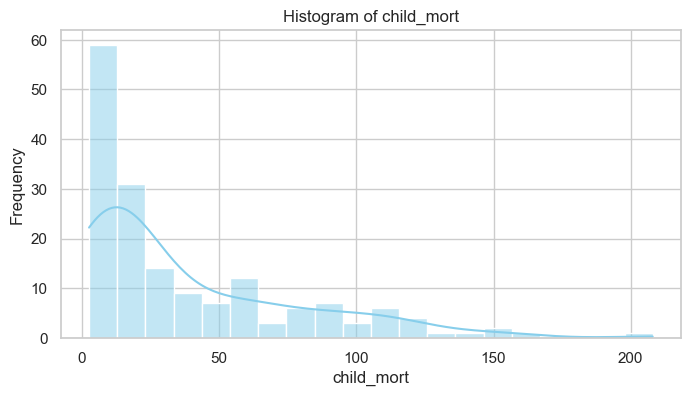

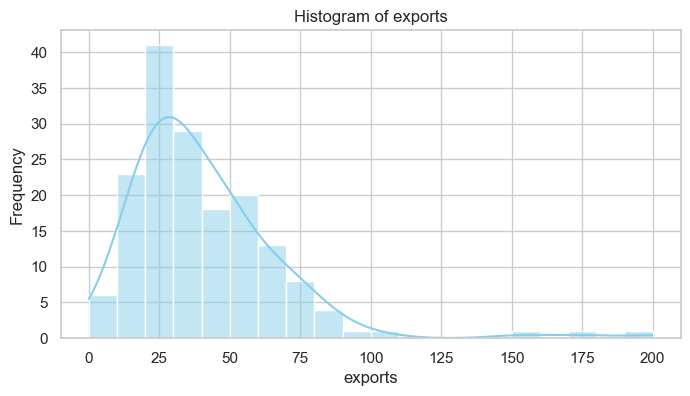

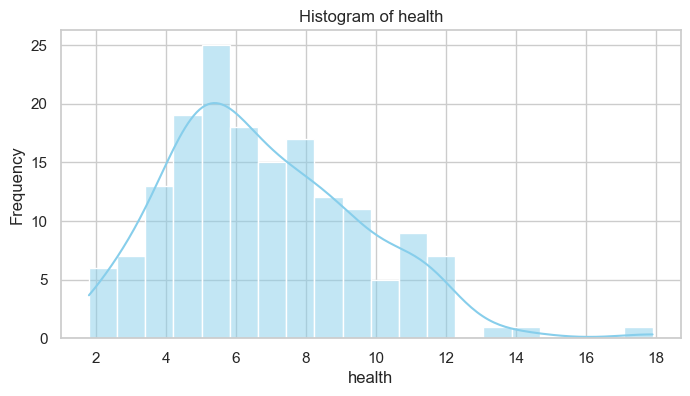

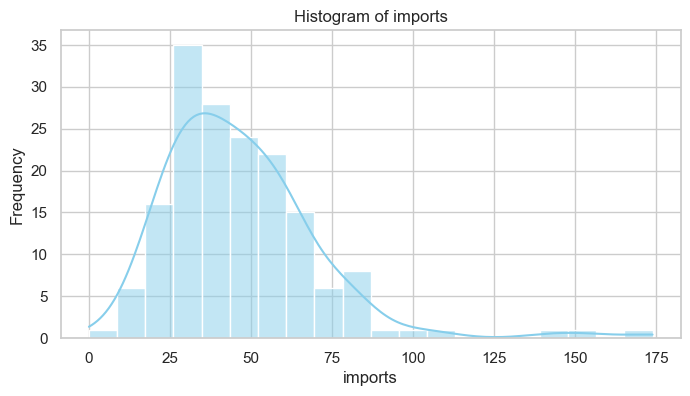

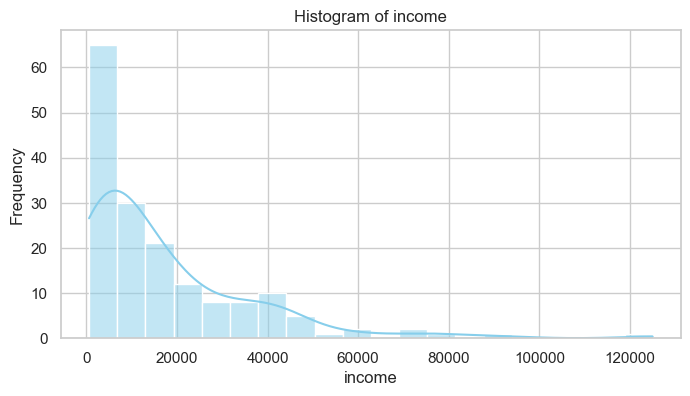

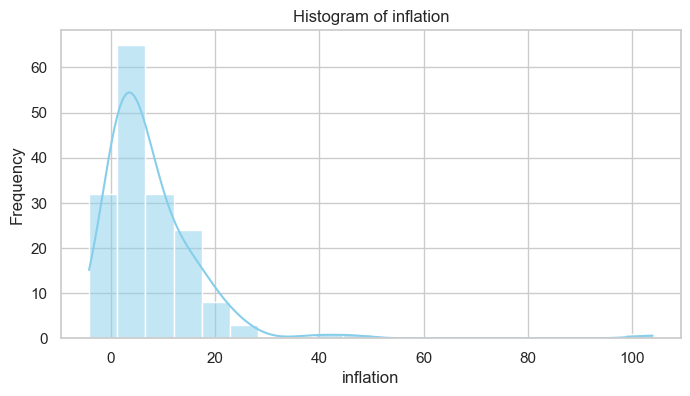

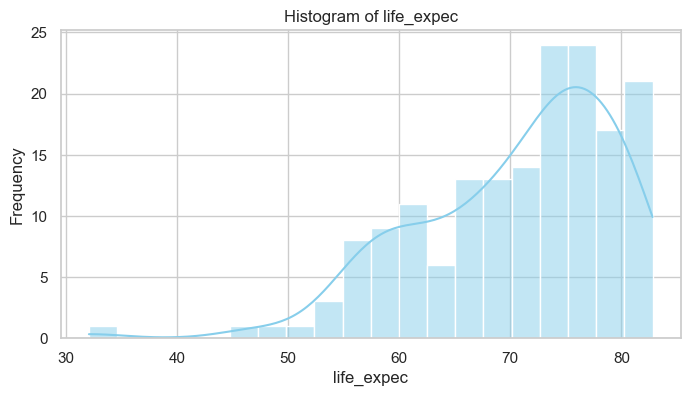

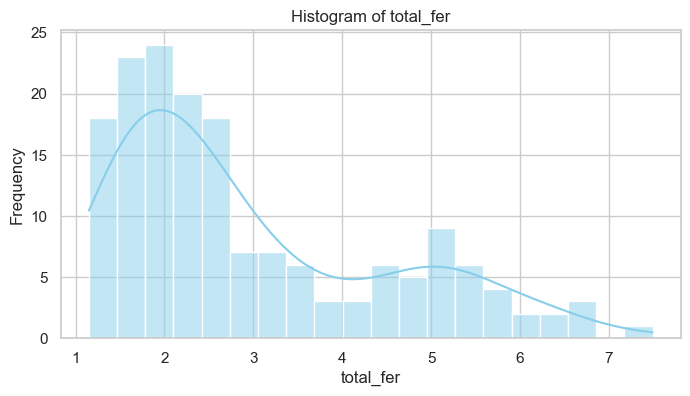

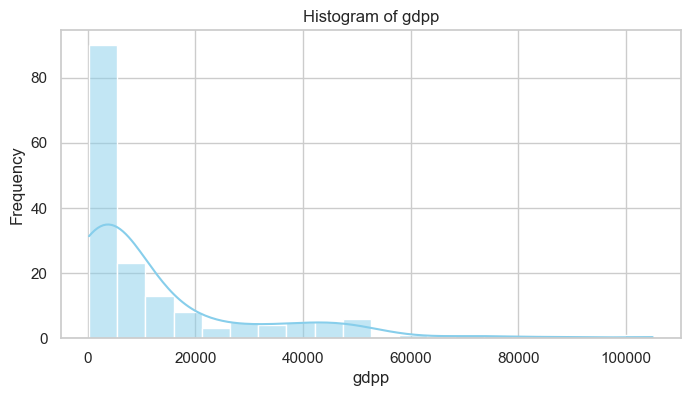

In [193]:

sns.set(style="whitegrid")  # Optional: Set the style for the plots

# Create histograms for each numerical column
for column in df.select_dtypes(include=[np.number]):  # Select only numerical columns
    plt.figure(figsize=(8, 4))  # Set the figure size
    sns.histplot(df[column], kde=True, bins=20, color='skyblue')  # Create the histogram
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


There are severe differences on income and health, specially with child mortality. In general the data is imbalanced and skewed
Health, income and child mortality could be a good criteria to decide how to assign the budget for each country. 

In [194]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Understanding the meaning of each parameter:

Columns dictionary: 

**Column Name**   |   **Description**
:--- | :---
country   |   Name of the country
child_mort   |   Death of children under 5 years of age per 1000 live births
exports   |   Exports of goods and services per capita. Given as %age of the GDP per capita
health   |   Total health spending per capita. Given as %age of GDP per capita
imports   |   Imports of goods and services per capita. Given as %age of the GDP per capita
Income   |   Net income per person
Inflation   |   The measurement of the annual growth rate of the Total GDP
life_expec   |   The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer   |   The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp   |   The GDP per capita. Calculated as the Total GDP divided by the total population.


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [196]:
df.duplicated().sum()

0

In [197]:
#null value 
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Comments: 
No null values. No missing values. 
No duplicated values on df. 
No wrong value types.
The Data frame is ready to go

### Data
c. Drop the 'country' column and store it in a separate dataframe. 
Use seaborn.heatmap to display the correlation matrix of the features.
Use seaborn.pairplot to generate scatter plots and histograms.
Use markdown to make observations. 

In [198]:
# Drop the 'country' column
dfnotag = df.drop(columns=['country'])
dfnotag.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [199]:
#Correlation matrix of features without country
correlation_matrix = dfnotag.corr()
correlation_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


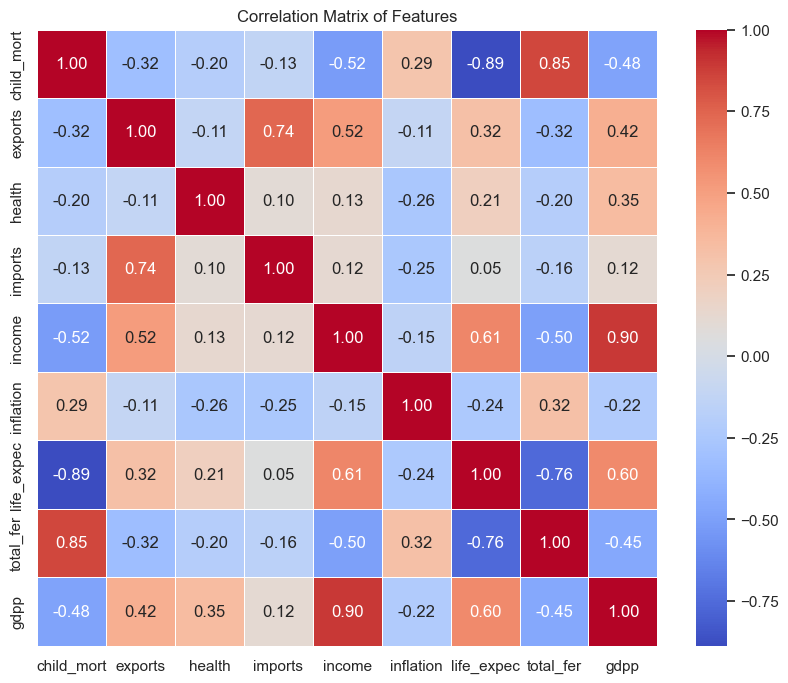

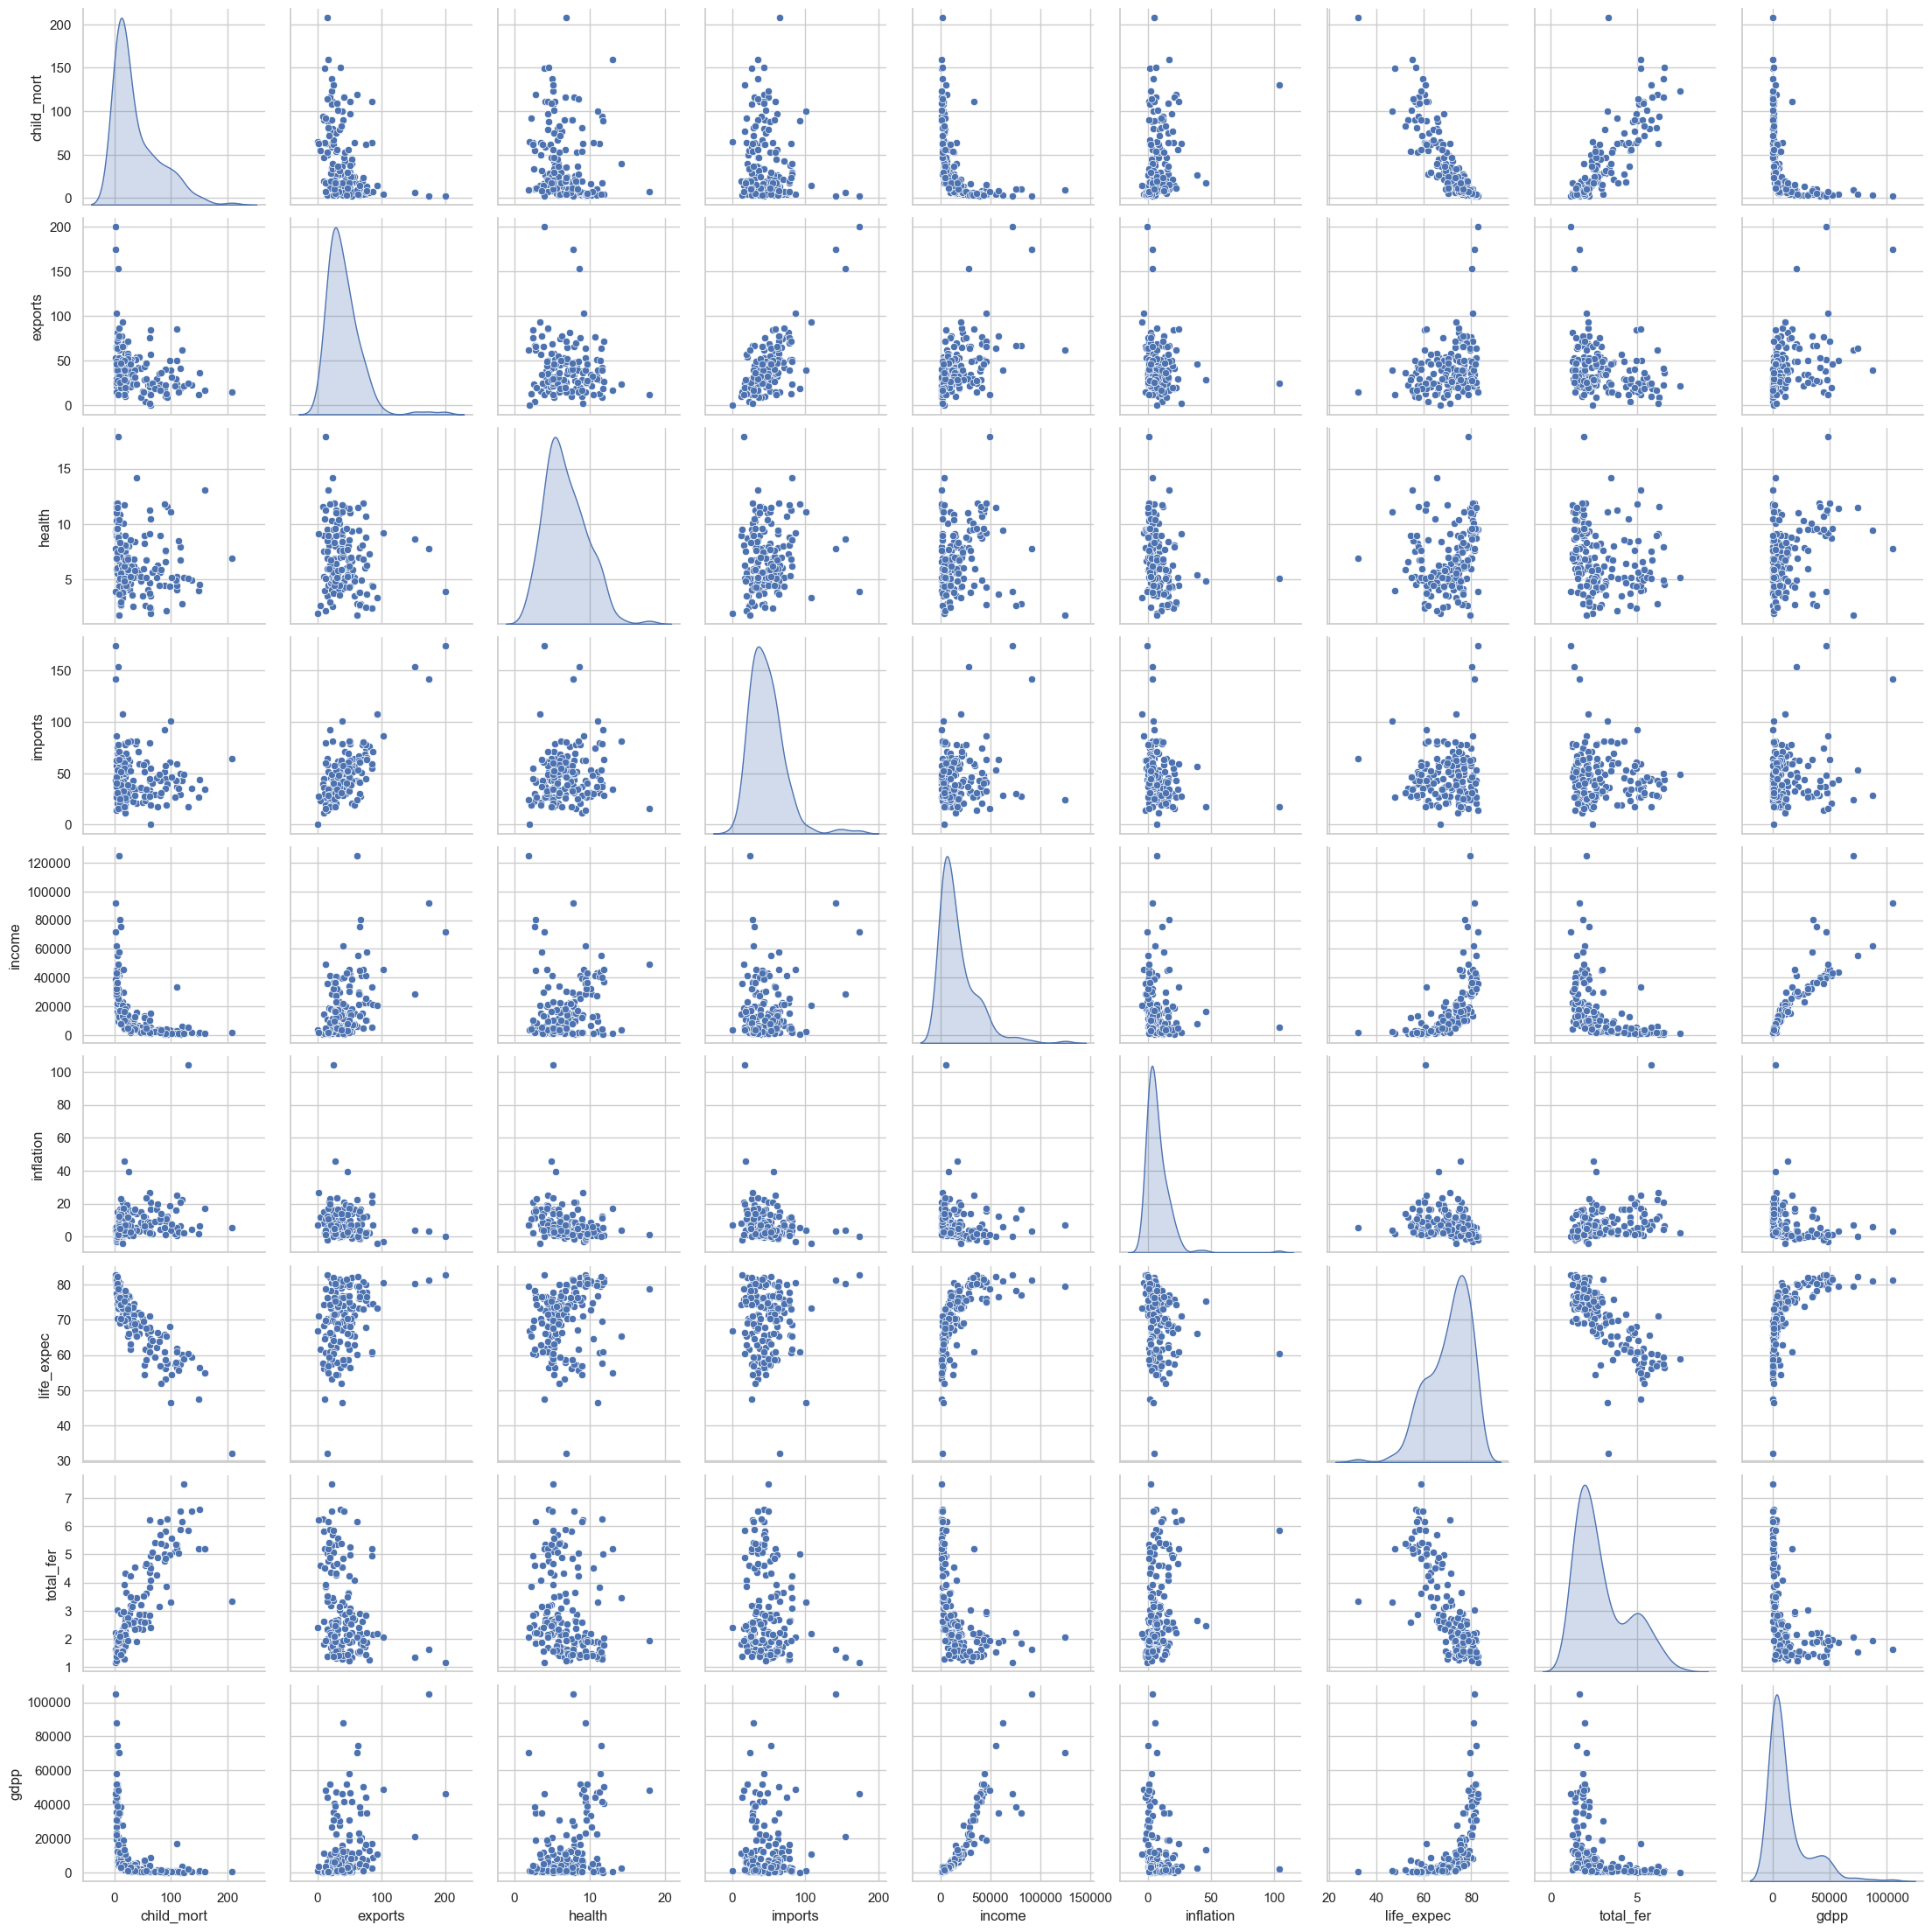

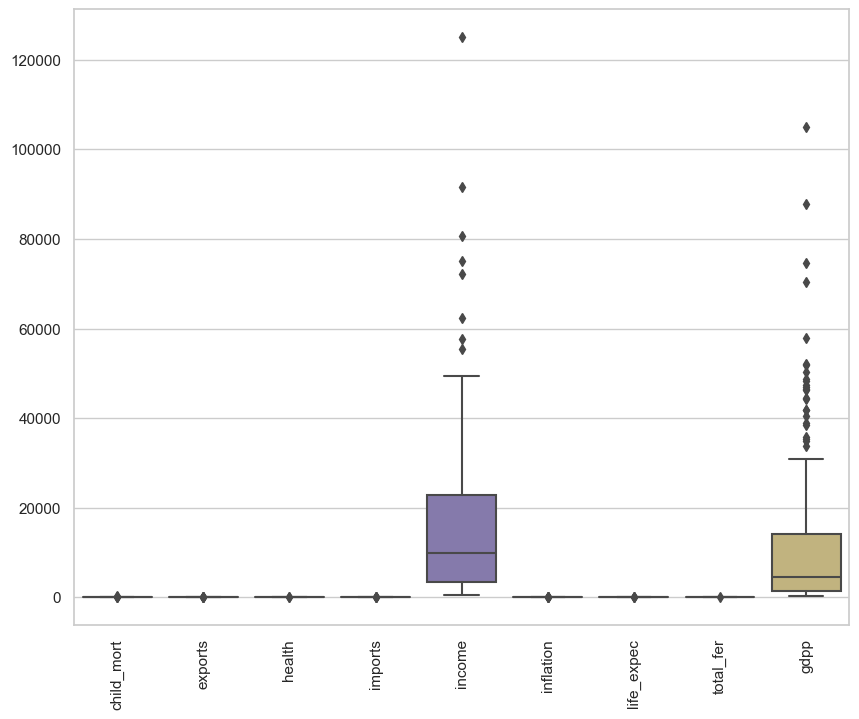

In [200]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Create a pairplot
sns.pairplot(dfnotag, diag_kind='kde')
plt.show()

# Create a boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=dfnotag)
plt.xticks(rotation=90)
plt.show()


From above we can conclude that:
gdpp and income,imports and exports,child_mort and total_fert are highly positive correlated, those are related to income, so was expected
whereas life_expec and child_mort are highly negative correlated that are health, also was expected. 
we will look for cross relationships between health and income to decide the targeted countries to asign the budget later on.
Income has outliers, Health has also outliers, but the income ones are higher than health and comparatively helath do not apear on the box plot

There is an inverse proportional relationship between health and income. 
Countries with low income have more child mortality

### Modeling
Use sklearn.preprocessing.StandardScaler to scale the data. Print the header.
Use sklearn.cluster.KMeans to cluster the data. Try values of n_cluster in the range [2, 10]; calculate and store the silhouette score for each.
Create a plot of silhouette score vs. n_clusters. Using this plot, justify the number of clusters for this use case in a markdown cell. Save the corresponding model as your best model.



In [201]:
# Import the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler to maintain consistency in the model's predictions.
scaler = StandardScaler()

# Fit and transform the data using the StandardScaler
scaled_data = scaler.fit_transform(dfnotag)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=dfnotag.columns)

# Print the header of the scaled DataFrame
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


Now we have standarized values for all features. It doesnt matter if we had skewed or biased features before. This step contributes to the stability and accuracy of the model, ultimately leading to more reliable results in data analysis and modelinglater on.

### Modeling
Use sklearn.cluster.KMeans to cluster the data. Try values of n_cluster in the range [2, 10]; calculate and store the silhouette score for each.

In [202]:
# Define the range of n_clusters, which represents the number of clusters to try minimum 2 clusters, maximum 10 clusters
n_clusters_range = range(2, 11)

# Initialize a dictionary to store silhouette scores for different n_clusters
silhouette_scores = {}

# Iterate over each value of n_clusters and calculate silhouette score
for n_clusters in n_clusters_range:
    # Initialize a KMeans clustering model with the current n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the KMeans model to the scaled data and obtain cluster labels
    cluster_labels = kmeans.fit_predict(scaled_df)
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    
    # Store the silhouette score in the dictionary with n_clusters as the key
    silhouette_scores[n_clusters] = silhouette_avg

# Find the value of n_clusters with the highest silhouette score
best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
best_silhouette_score = silhouette_scores[best_n_clusters]  

# Print the best number of clusters based on the highest silhouette score
# Convert to a DataFrame
silhouette_df = pd.DataFrame(list(silhouette_scores.items()), columns=["n_clusters", "Silhouette Score"])

# Print the DataFrame
print(silhouette_df)
print(f"Best number of clusters: {best_n_clusters}")
print(f"Best silhouette score: {best_silhouette_score:.4f}")



   n_clusters  Silhouette Score
0           2          0.287357
1           3          0.283296
2           4          0.301376
3           5          0.299259
4           6          0.235070
5           7          0.249050
6           8          0.241402
7           9          0.203407
8          10          0.219314
Best number of clusters: 4
Best silhouette score: 0.3014


### Modeling
Create a plot of silhouette score vs. n_clusters. Using this plot, justify the number of clusters for this use case in a markdown cell. 
Save the corresponding model as your best model.

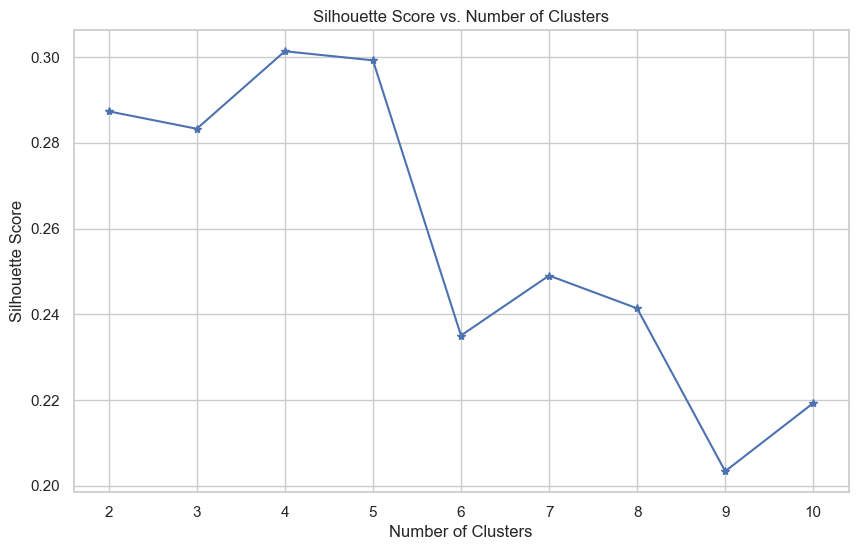

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [203]:
# Plot silhouette score vs. n_clusters
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='*')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Best number of clusters based on the highest silhouette score
best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)

# Create and save the best KMeans model
best_kmeans_model = KMeans(n_clusters=best_n_clusters, random_state=42)
best_kmeans_model.fit(scaled_df)

# Obtain the cluster labels
cluster_labels = best_kmeans_model.labels_

# Add the cluster labels as a new column to the DataFrame
df['Cluster Labels'] = cluster_labels
df




### Conclusion
* Based on your analysis in step 1, choose a pair of columns and generate a scatter plot of the data. 

* Use the model predictions to colour the points according to the cluster they belong to. Use markdown to comment on the plot.

* Generate a histogram that shows the number of countries in each cluster. Use markdown to comment on the histogram.

* Print out the names of the countries within each cluster. Use markdown to comment on the countries that show up in each cluster. 

State the order of the clusters from those that need aid the most, to those that need aid the least.

Use markdown to describe which countries will get funds, and how much each will get.

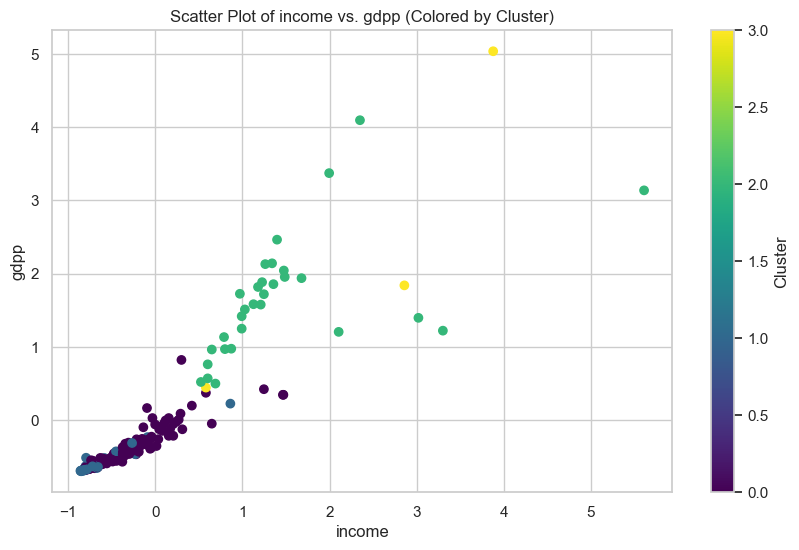

In [204]:
# Choose the pair of columns for the scatter plot
x_column = 'income'
y_column = 'gdpp'

#those 2 belongs to income, so they are direct and proportionaly correlated

# Create a scatter plot and color points by cluster
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df[x_column], scaled_df[y_column], c=cluster_labels, cmap='viridis')
plt.title(f'Scatter Plot of {x_column} vs. {y_column} (Colored by Cluster)')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.colorbar(label='Cluster')
plt.show()


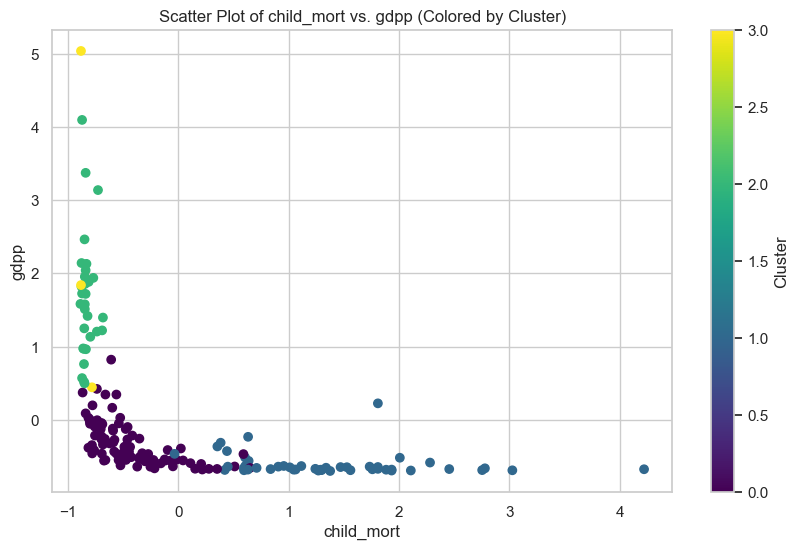

In [205]:
#visulization of clusters child mortality vs income, this relatoin is inverse proportional
x_column = 'child_mort'
y_column = 'gdpp'

# Create a scatter plot and color points by cluster
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df[x_column], scaled_df[y_column], c=cluster_labels, cmap='viridis')
plt.title(f'Scatter Plot of {x_column} vs. {y_column} (Colored by Cluster)')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.colorbar(label='Cluster')
plt.show()


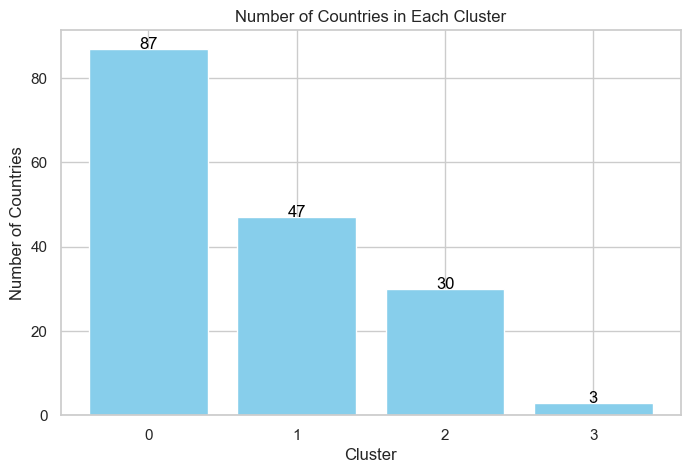

In [206]:
# Count the number of countries in each cluster
unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)

# Create a histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(unique_labels, label_counts, tick_label=unique_labels, color='skyblue')
plt.title('Number of Countries in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.xticks(unique_labels)

# Add the number inside each bar
for bar, count in zip(bars, label_counts):
    height = bar.get_height()
    xpos = bar.get_x() + bar.get_width() / 2
    ypos = height + 0  # Adjust the vertical position of the number
    plt.text(xpos, ypos, str(count), ha='center', fontsize=12, color='black')

plt.show()


In [207]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [208]:
# Obtain the cluster labels
cluster_labels = best_kmeans_model.labels_

# Add the cluster labels as a new column to the DataFrame
df['Cluster Labels'] = cluster_labels
df
# Filter the DataFrame to show only rows with Cluster Labels equal to 0
cluster_0_df = df[df['Cluster Labels'] == 0]

# Keep only the "country" and "Cluster Labels" columns
cluster_0_df = cluster_0_df[['country', 'Cluster Labels']]

# Display the resulting DataFrame
cluster_0_df



,country,Cluster Labels
1,Albania,0
2,Algeria,0
4,Antigua and Barbuda,0
5,Argentina,0
6,Armenia,0
...,...,...
160,Uruguay,0
161,Uzbekistan,0
162,Vanuatu,0
163,Venezuela,0


In [209]:
# Filter the DataFrame to show only rows with Cluster Labels equal to 1
cluster_1_df = df[df['Cluster Labels'] == 1]

# Keep only the "country" and "Cluster Labels" columns
cluster_1_df = cluster_1_df[['country', 'Cluster Labels']]

# Display the resulting DataFrame
cluster_1_df

,country,Cluster Labels
0,Afghanistan,1
3,Angola,1
17,Benin,1
21,Botswana,1
25,Burkina Faso,1
26,Burundi,1
28,Cameroon,1
31,Central African Republic,1
32,Chad,1
36,Comoros,1


In [210]:
# Filter the DataFrame to show only rows with Cluster Labels equal to 2
cluster_2_df = df[df['Cluster Labels'] == 2]

# Keep only the "country" and "Cluster Labels" columns
cluster_2_df = cluster_2_df[['country', 'Cluster Labels']]

# Display the resulting DataFrame
cluster_2_df

,country,Cluster Labels
7,Australia,2
8,Austria,2
15,Belgium,2
23,Brunei,2
29,Canada,2
42,Cyprus,2
44,Denmark,2
53,Finland,2
54,France,2
58,Germany,2


In [211]:
# Filter the DataFrame to show only rows with Cluster Labels equal to 3
cluster_3_df = df[df['Cluster Labels'] == 3]

# Keep only the "country" and "Cluster Labels" columns
cluster_3_df = cluster_3_df[['country', 'Cluster Labels']]

# Display the resulting DataFrame
cluster_3_df

,country,Cluster Labels
91,Luxembourg,3
98,Malta,3
133,Singapore,3


This result make sense with the last cross variables health - income graph, the countries with more child mortality are in this cluster. 
We have 47 countries, now we have to figure out how to spread the budget.

In [212]:
# Add the "child_mort" column to the DataFrame
cluster_1_df['child_mort'] = df['child_mort']

# Display the resulting DataFrame
cluster_1_df = cluster_1_df.sort_values(by='child_mort', ascending=False)
cluster_1_df

# Calculate the total child mortality
total_child_mort = cluster_1_df['child_mort'].sum()
total_child_mort

# Calculate the percentage of 'Value' for each row
cluster_1_df['ponderated_weigth'] = cluster_1_df['child_mort'] / total_child_mort * 100

# Calculate the cumulative sum of 'Value'
cluster_1_df['Cumulative Value %'] = cluster_1_df['ponderated_weigth'].cumsum().round(2)

# add a column with the asigned budget
cluster_1_df['Budget $'] = (cluster_1_df['ponderated_weigth'] * 1000000).round(2)

cluster_1_df


,country,Cluster Labels,child_mort,ponderated_weigth,Cumulative Value %,Budget $
66,Haiti,1,208.0,4.760597,4.76,4760596.91
132,Sierra Leone,1,160.0,3.661998,8.42,3661997.62
32,Chad,1,150.0,3.433123,11.86,3433122.77
31,Central African Republic,1,149.0,3.410235,15.27,3410235.28
97,Mali,1,137.0,3.135585,18.40,3135585.46
113,Nigeria,1,130.0,2.975373,21.38,2975373.07
112,Niger,1,123.0,2.815161,24.19,2815160.67
3,Angola,1,119.0,2.723611,26.92,2723610.73
25,Burkina Faso,1,116.0,2.654948,29.57,2654948.27
37,"Congo, Dem. Rep.",1,116.0,2.654948,32.23,2654948.27


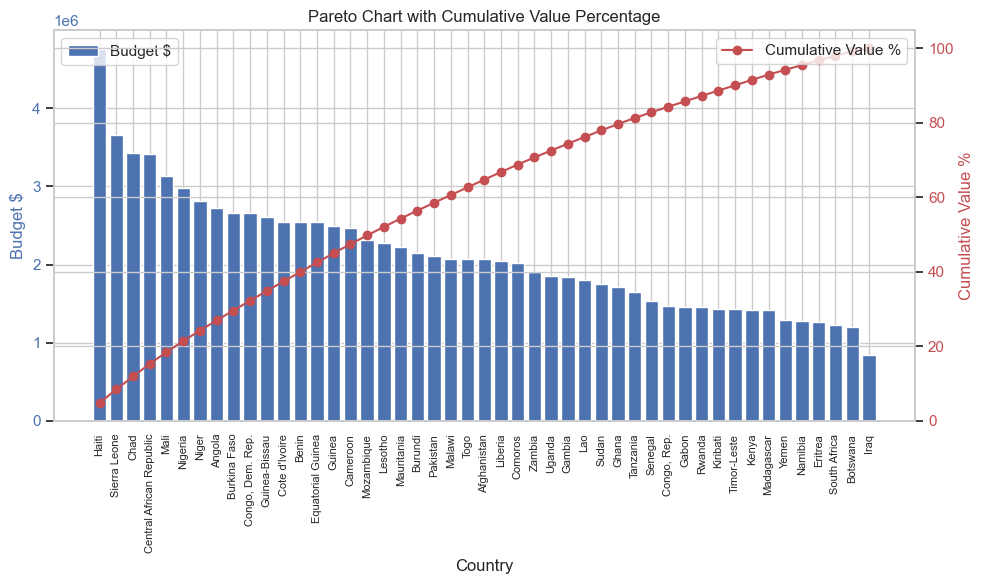

In [215]:
# Create a Pareto chart with a secondary y-axis for percentage
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for 'Budget $' on the left y-axis
ax1.bar(cluster_1_df['country'], cluster_1_df['Budget $'], color='b', label='Budget $')
ax1.set_xlabel('Country')
ax1.set_ylabel('Budget $', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Rotate X-axis labels by 45 degrees
plt.xticks(rotation=90, fontsize=8)  # Adjust the fontsize as needed

# Create a secondary y-axis (right-side) for 'Cumulative Value' as a percentage
ax2 = ax1.twinx()
ax2.plot(cluster_1_df['country'], cluster_1_df['Cumulative Value %'], marker='o', color='r', label='Cumulative Value %')
ax2.set_ylabel('Cumulative Value %', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

plt.title('Pareto Chart with Cumulative Value Percentage')

plt.tight_layout()
plt.show()


# Conclutions: 
The allocation of budget resources will be determined based on child mortality rates, with a specific focus on Cluster 1, which exhibits the highest child mortality index among all clusters. To quantify the severity of child mortality and prioritize resource distribution, a Pareto analysis has been employed to weigh the level of need within this cluster.

There are developed and developing countries in the cluster, but not as part of the futures to have a better criteria to spread the budget accordingly. 